In [19]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as pt

f_path = r"C:\Users\admin\geopython\L4\E4\dataE4\TravelTimes_to_5975373_Forum.csv"

shp_path = r"C:\Users\admin\geopython\L4\E4\dataE4\MetropAccess_YKR_grid_EurefFIN.shp"

data = pd.read_csv(f_path,sep=',',encoding='latin1')
#(fp_cl,sep=';',encoding='latin1')

#progress check
#data.head(5)

data.columns

#sel_cols = ["pt_r_tt","car_r_t","from_id","to_id"]
#selected_cols = ['pt_r_tt','car_r_t','from_id','to_id']

#data = data [selected_cols]

data = data[['pt_r_tt', 'car_r_t', 'from_id','to_id']].copy()

#rename columns pt_r_tt and Car_r_t

data.rename(columns={'pt_r_tt':'public_trans','car_r_t':'car',}, inplace=True)

#progress check
data.head(5)




,public_trans,car,from_id,to_id
0,137,49,5785640,5975373
1,134,49,5785641,5975373
2,134,57,5785642,5975373
3,144,60,5785643,5975373
4,121,48,5787544,5975373


In [24]:
poly_shp = gpd.read_file(shp_path)

poly_shp.head()

#check for data types

#display(data.dtypes)
#display(poly_shp.dtypes)

,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.0001388059 6697750.000128186,..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.00013875 6697750.000128181, 3..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.0001386951 6697750.000128172,..."
3,382625.0,6697880.0,5785643,"POLYGON ((382750.0001386406 6697750.000128165,..."
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000138978 6697500.000128254, ..."


In [39]:

data = data.merge(poly_shp, how='inner', left_on='from_id', right_on='YKR_ID', suffixes=('', '_legend'))
#merged = pd.merge(data,poly_shp,how="inner",left_on="from_id",right_on='YKR_ID')

#merged.head()

In [40]:
import pysal as ps

#create classifier
classifier = ps.Equal_Interval.make(k=5)

#apply classes to both modes of transportation
#merged['public_trans_classes'] = merged[['public_trans']].apply(classifier)


#merged['car_classes'] = merged[['car']].apply(classifier)

data['public_trans_classes'] = data[['public_trans']].apply(classifier)


data['car_classes'] = data[['car']].apply(classifier)

data.head()

,public_trans,car,from_id,to_id,x,y,YKR_ID,geometry,x_legend,y_legend,YKR_ID_legend,geometry_legend,public_trans_classes,car_classes
0,137,49,5785640,5975373,381875.0,6697880.0,5785640,"POLYGON ((382000.0001388059 6697750.000128186,...",381875.0,6697880.0,5785640,"POLYGON ((382000.0001388059 6697750.000128186,...",3,3
1,134,49,5785641,5975373,382125.0,6697880.0,5785641,"POLYGON ((382250.00013875 6697750.000128181, 3...",382125.0,6697880.0,5785641,"POLYGON ((382250.00013875 6697750.000128181, 3...",3,3
2,134,57,5785642,5975373,382375.0,6697880.0,5785642,"POLYGON ((382500.0001386951 6697750.000128172,...",382375.0,6697880.0,5785642,"POLYGON ((382500.0001386951 6697750.000128172,...",3,3
3,144,60,5785643,5975373,382625.0,6697880.0,5785643,"POLYGON ((382750.0001386406 6697750.000128165,...",382625.0,6697880.0,5785643,"POLYGON ((382750.0001386406 6697750.000128165,...",3,3
4,121,48,5787544,5975373,381125.0,6697630.0,5787544,"POLYGON ((381250.000138978 6697500.000128254, ...",381125.0,6697630.0,5787544,"POLYGON ((381250.000138978 6697500.000128254, ...",3,3


AttributeError: Unknown property column

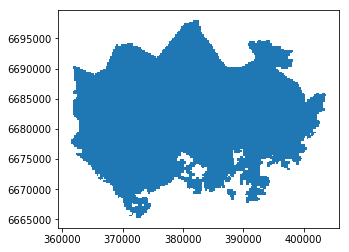

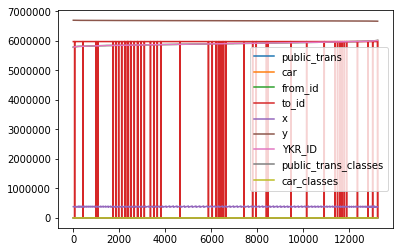

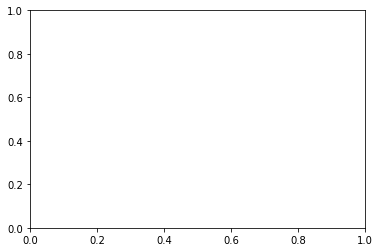

In [41]:
import matplotlib.pyplot as pt
import geopandas as gpd



poly_shp.plot()

merged.plot()
data.plot(column="car_classes", linewidth=0, legend=True);